Cuaderno de Regresión

Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo

In [4]:
import numpy as np
import matplotlib.pyplot as plt

1.1 Modelo lineal

Text(0.5, 1.0, 'Dataset generado')

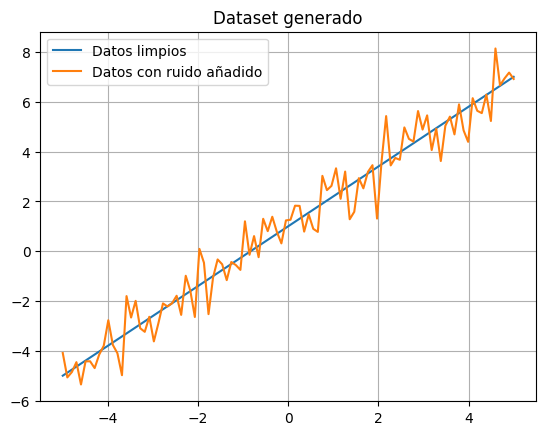

In [5]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

1.2 Creación del modelo

In [6]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.18829532 0.99696613]


Text(0.5, 1.0, 'Modelo de regresión lineal')

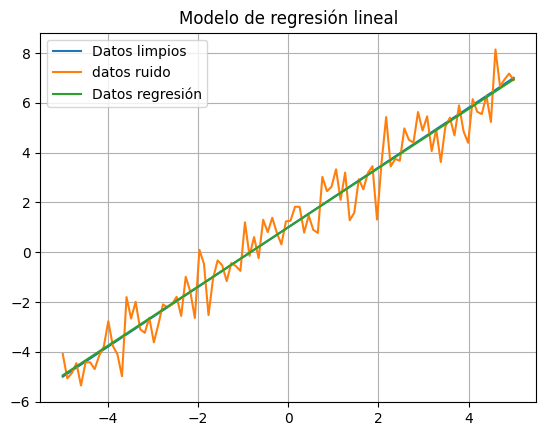

In [7]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue

2.1 Análisis exploratorio de los datos

In [8]:
import pandas as pd
import sklearn
import seaborn as sns

In [9]:
df_helados = pd.read_csv("/content/IceCreamData.csv")
df_helados.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [10]:
df_helados.info
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [11]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


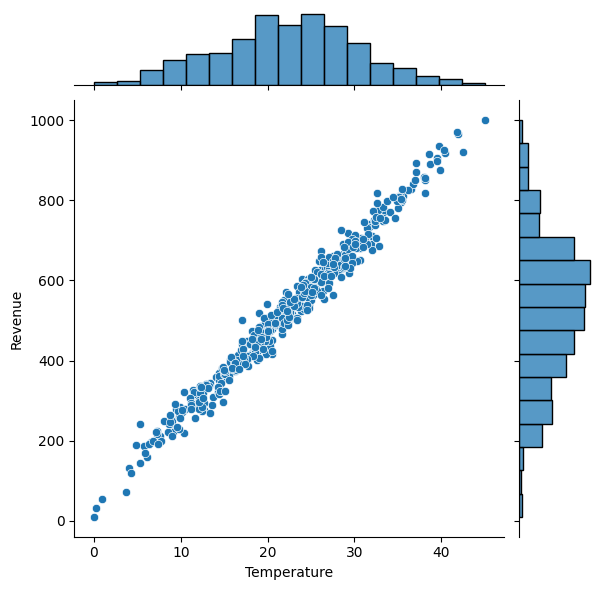

In [12]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

2.2 Preparando los datos

In [13]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


2.3 modelo de regresión lineal

In [14]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [21.50409246], el intersecto (A) es 42.45594349728793


2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

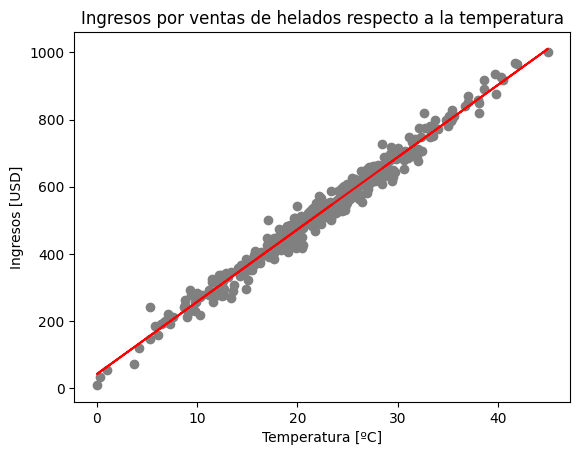

In [15]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

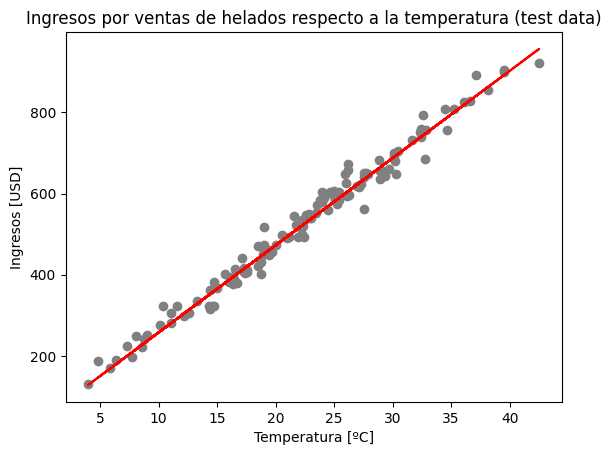

In [16]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')

Error medio cuadrático

In [17]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 580.8649275375767
Root Mean Squared Error: 24.101139548527094


Error medio absoluto

In [18]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 18.176047086589904


R cuadrado

In [19]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9810107667520237


Sección 3: regresión polinómica

Text(0.5, 1.0, 'Dataset generado')

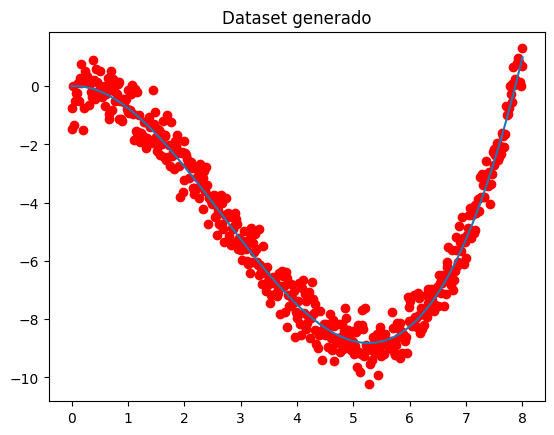

In [20]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

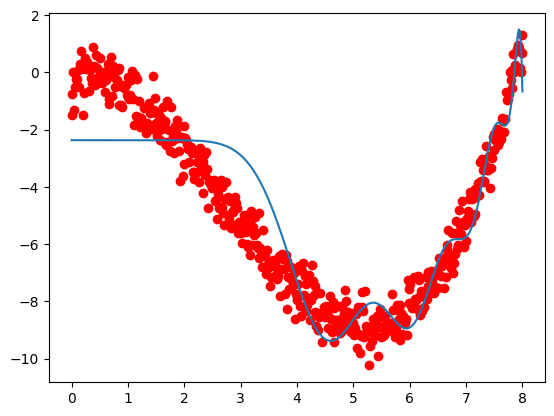

In [34]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=25)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

**Ejercicio**

Grado: 1

In [35]:
poly_regressor = PolynomialFeatures(degree=1)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

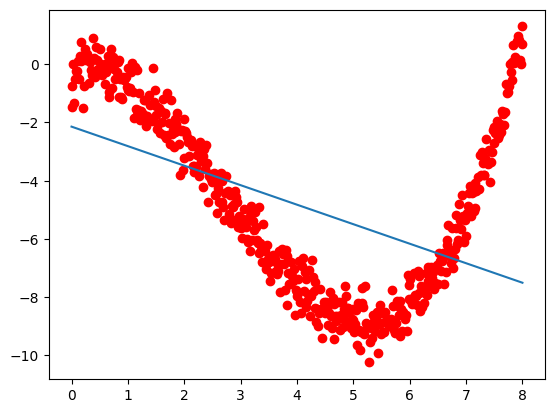

In [36]:
plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [38]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 7.2149658348663905
RMSE: 2.6860688440295775
MAE: 2.232188838349547


Grado: 2

In [39]:
poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

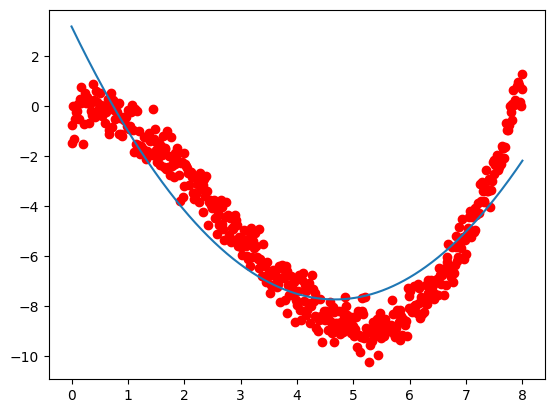

In [40]:
plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [24]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 1.4804520580949778
RMSE: 1.216738286606852
MAE: 1.0462446737193913


Grado: 3

In [41]:
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

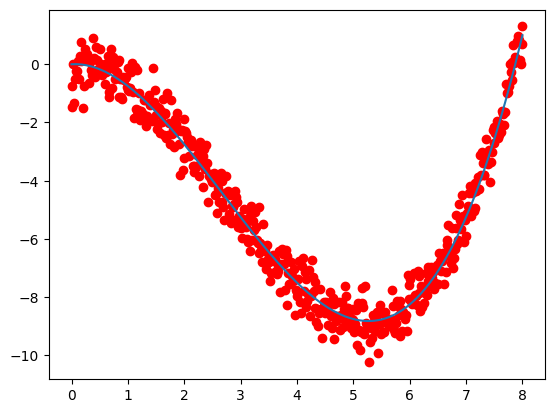

In [42]:
plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [26]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 9.365101948452178e-29
RMSE: 9.67734568383923e-15
MAE: 9.08989073247768e-15


Grado: 4

In [43]:
poly_regressor = PolynomialFeatures(degree=4)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

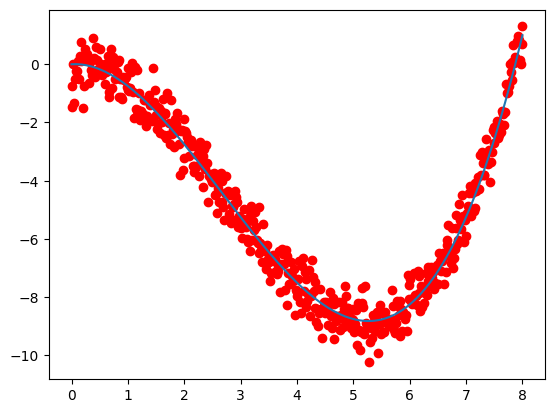

In [44]:
plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [45]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 1.4213141157946256e-27
RMSE: 3.77003198367683e-14
MAE: 3.155956312256292e-14


Grado: 5

MSE: 1.0761711454192941e-26
RMSE: 1.0373866904001103e-13
MAE: 9.088521921813905e-14


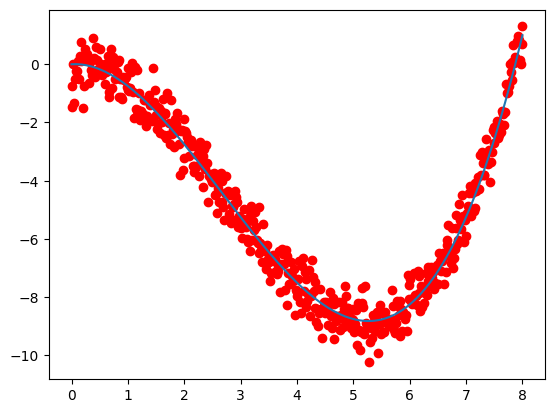

In [48]:
poly_regressor = PolynomialFeatures(degree=5)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 6

In [27]:
poly_regressor = PolynomialFeatures(degree=6)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

In [28]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 5.493540642797014e-25
RMSE: 7.411842309977333e-13
MAE: 6.732209493110104e-13


Grado: 7

MSE: 9.120635586022427e-23
RMSE: 9.550201875364953e-12
MAE: 7.654969710196858e-12


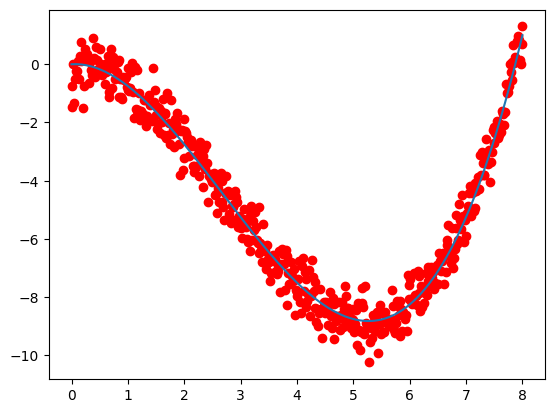

In [49]:
poly_regressor = PolynomialFeatures(degree=7)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 8

MSE: 1.0654607348268511e-21
RMSE: 3.2641396030605845e-11
MAE: 2.7575643147832034e-11


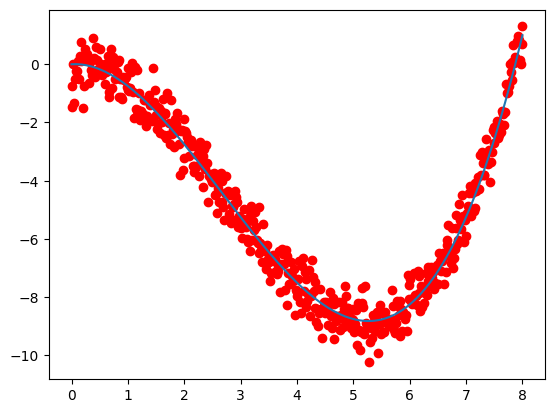

In [50]:
poly_regressor = PolynomialFeatures(degree=8)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 9

MSE: 3.9548094281852627e-19
RMSE: 6.288727556656643e-10
MAE: 4.5557848950739025e-10


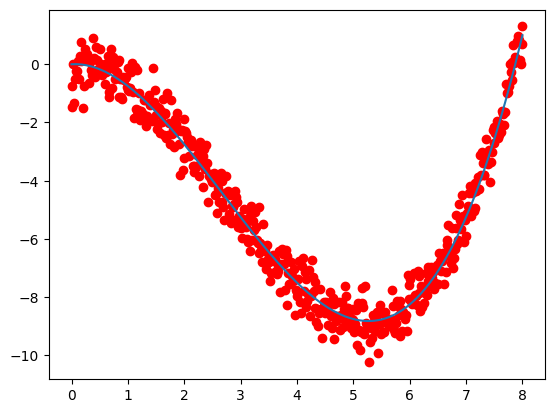

In [51]:
poly_regressor = PolynomialFeatures(degree=9)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 10

MSE: 1.390583107596075e-17
RMSE: 3.729052302658244e-09
MAE: 2.8551818549513574e-09


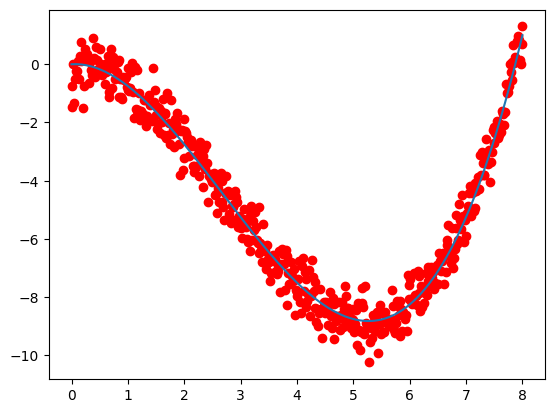

In [52]:
poly_regressor = PolynomialFeatures(degree=10)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 11

MSE: 1.7524364253471764e-16
RMSE: 1.3237962174546263e-08
MAE: 8.907147826491772e-09


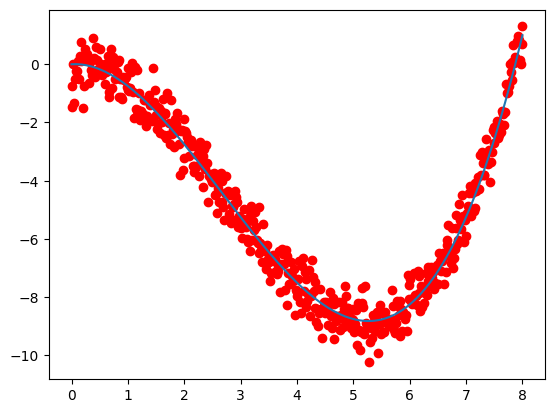

In [53]:
poly_regressor = PolynomialFeatures(degree=11)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 12

MSE: 5.858421899959318e-14
RMSE: 2.4204177118752286e-07
MAE: 1.8062617895458263e-07


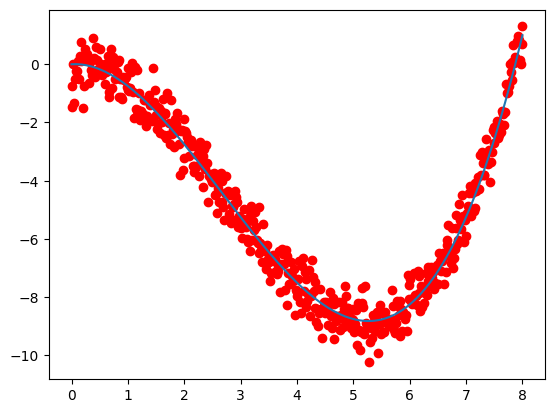

In [54]:
poly_regressor = PolynomialFeatures(degree=12)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 13

MSE: 4.3478134555103994e-13
RMSE: 6.593795155682651e-07
MAE: 4.917448140375402e-07


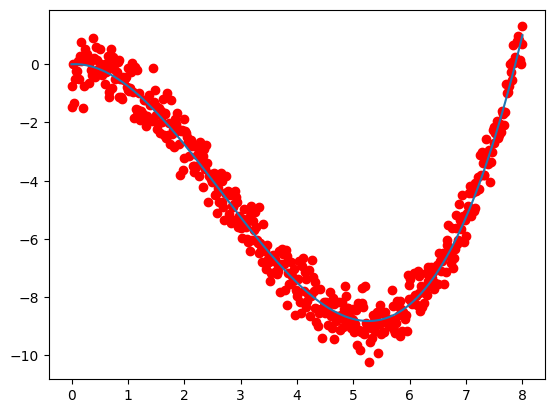

In [55]:
poly_regressor = PolynomialFeatures(degree=13)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 14

MSE: 8.547565044267683e-10
RMSE: 2.923621905149105e-05
MAE: 2.204741936232907e-05


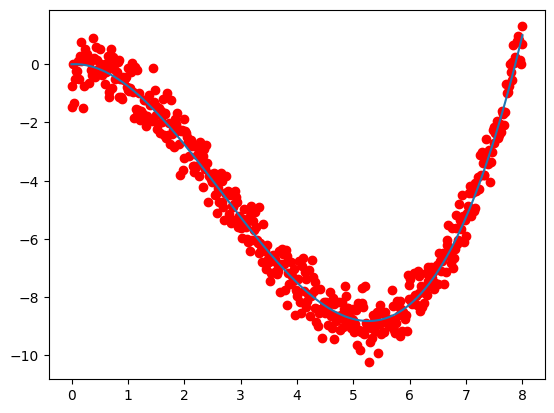

In [56]:
poly_regressor = PolynomialFeatures(degree=14)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 15

MSE: 1.0533632529204417e-07
RMSE: 0.0003245555812061228
MAE: 0.0002452402875374511


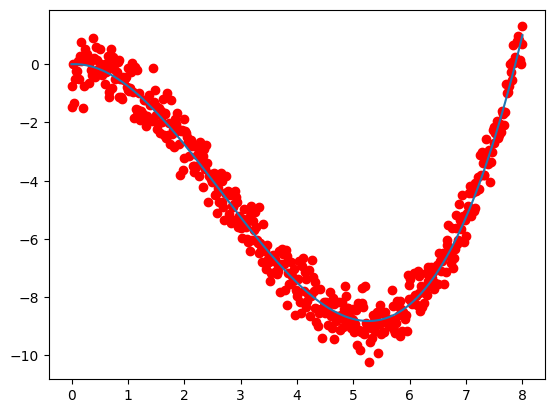

In [57]:
poly_regressor = PolynomialFeatures(degree=15)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 16

MSE: 1.760045411712804e-06
RMSE: 0.0013266670312149934
MAE: 0.0009833728280079965


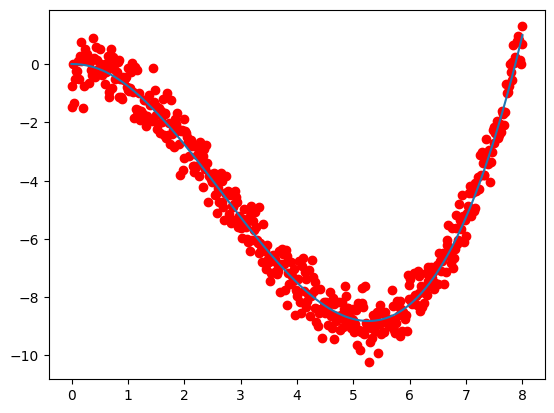

In [58]:
poly_regressor = PolynomialFeatures(degree=16)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 17

MSE: 0.0005062826391958134
RMSE: 0.022500725303772173
MAE: 0.015047576516966244


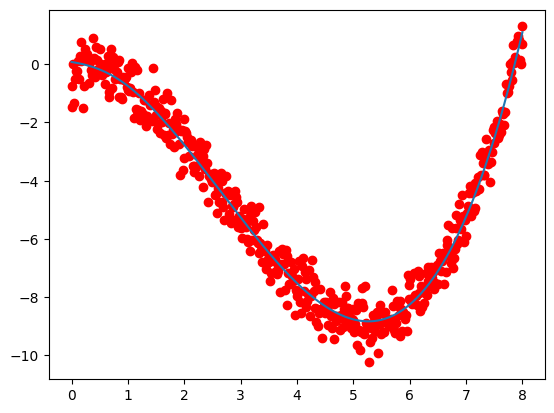

In [59]:
poly_regressor = PolynomialFeatures(degree=17)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 18

MSE: 0.007575009626491424
RMSE: 0.08703453123037674
MAE: 0.06841204350380038


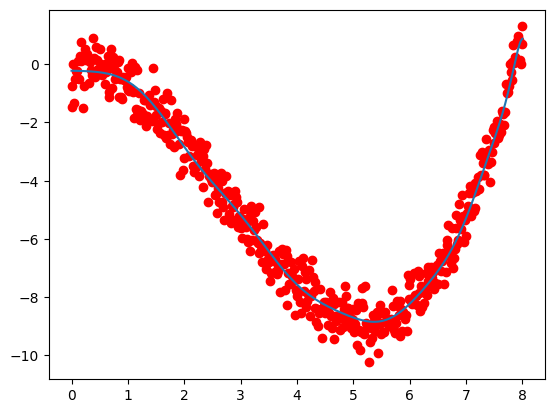

In [60]:
poly_regressor = PolynomialFeatures(degree=18)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 19

MSE: 0.1141840323713952
RMSE: 0.3379112788460829
MAE: 0.2619392836931895


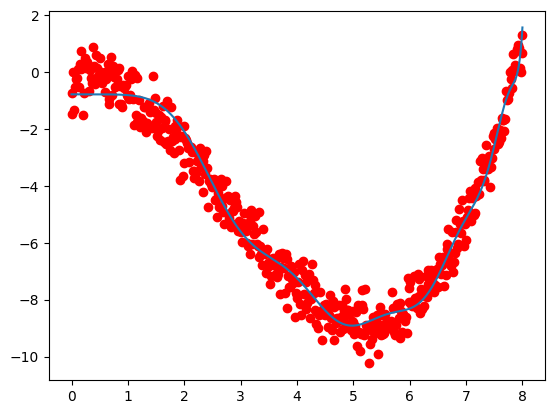

In [61]:
poly_regressor = PolynomialFeatures(degree=19)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Grado: 20

In [62]:
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))

model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

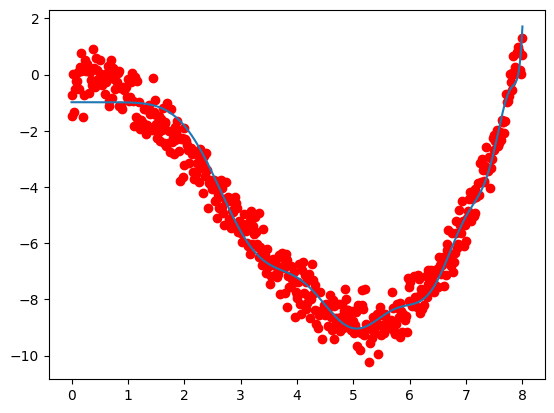

In [63]:
plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

In [30]:
mse = mean_squared_error(y_data, model.predict(poly_features))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_data, model.predict(poly_features))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 0.19651577256331854
RMSE: 0.44330099544589174
MAE: 0.34454371572414566
